In [ ]:
# Step 1: Data Cleaning and Preprocessing

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/Salary_Data.csv")  # Adjust path if needed

# Drop rows with missing values
df_cleaned = df.dropna().reset_index(drop=True)

# Initialize LabelEncoders
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()

# Encode categorical columns
df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])
df_cleaned['Education Level'] = le_edu.fit_transform(df_cleaned['Education Level'])
df_cleaned['Job Title'] = le_job.fit_transform(df_cleaned['Job Title'])

# Preview cleaned data
print(f"Cleaned dataset shape: {df_cleaned.shape}")
print(df_cleaned.head())


Cleaned dataset shape: (6698, 6)
    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        175                  5.0   90000.0
1  28.0       0                3         18                  3.0   65000.0
2  45.0       1                5        144                 15.0  150000.0
3  36.0       0                0        115                  7.0   60000.0
4  52.0       1                3         25                 20.0  200000.0


In [ ]:
# Step 2: Train-Test Split and Model Training + Evaluation

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Define features and target
X = df_cleaned.drop(columns=['Salary'])
y = df_cleaned['Salary']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

# Train, predict, and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Display results
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
print("Model Performance Comparison:\n")
print(results_df)


Model Performance Comparison:

                   R2 Score           MAE           MSE          RMSE
Random Forest      0.975335   3235.171172  7.033092e+07   8386.353418
Gradient Boosting  0.935165   9884.521953  1.848738e+08  13596.830813
Linear Regression  0.675099  24024.935440  9.264430e+08  30437.526495
SVR                0.002618  46244.020346  2.843994e+09  53329.114610


In [ ]:
# Step 2: Extended Model Training and Evaluation (excluding XGBoost)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Feature and target split
X = df_cleaned.drop(columns=['Salary'])
y = df_cleaned['Salary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
    # "XGBoost": XGBRegressor() ← Disabled due to libxgboost error
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Display sorted results
results_df = pd.DataFrame(results).T.sort_values(by="R2 Score", ascending=False)
print("Extended Model Comparison:\n")
print(results_df)


Extended Model Comparison:

                     R2 Score           MAE           MSE          RMSE
Random Forest        0.975335   3235.171172  7.033092e+07   8386.353418
Decision Tree        0.971018   2944.999982  8.264181e+07   9090.754032
K-Nearest Neighbors  0.966165   4050.582537  9.647958e+07   9822.401783
Gradient Boosting    0.935165   9884.521953  1.848738e+08  13596.830813
Linear Regression    0.675099  24024.935440  9.264430e+08  30437.526495
Ridge Regression     0.675096  24025.174199  9.264501e+08  30437.642673
Lasso Regression     0.675096  24025.174143  9.264509e+08  30437.656132
SVR                  0.002618  46244.020346  2.843994e+09  53329.114610


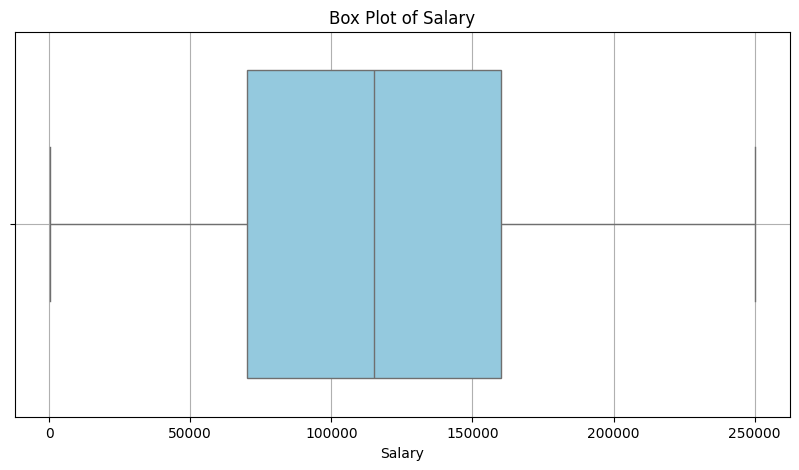

In [8]:
# Box Plot of Salary to detect outliers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Salary_Data.csv")  # Change path if needed

# Drop rows with missing values
df_cleaned = df.dropna().reset_index(drop=True)

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Salary'], color='skyblue')
plt.title("Box Plot of Salary")
plt.xlabel("Salary")
plt.grid(True)
plt.show()


/tmp/ipython-input-9-321933242.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=r2_df, palette="viridis")


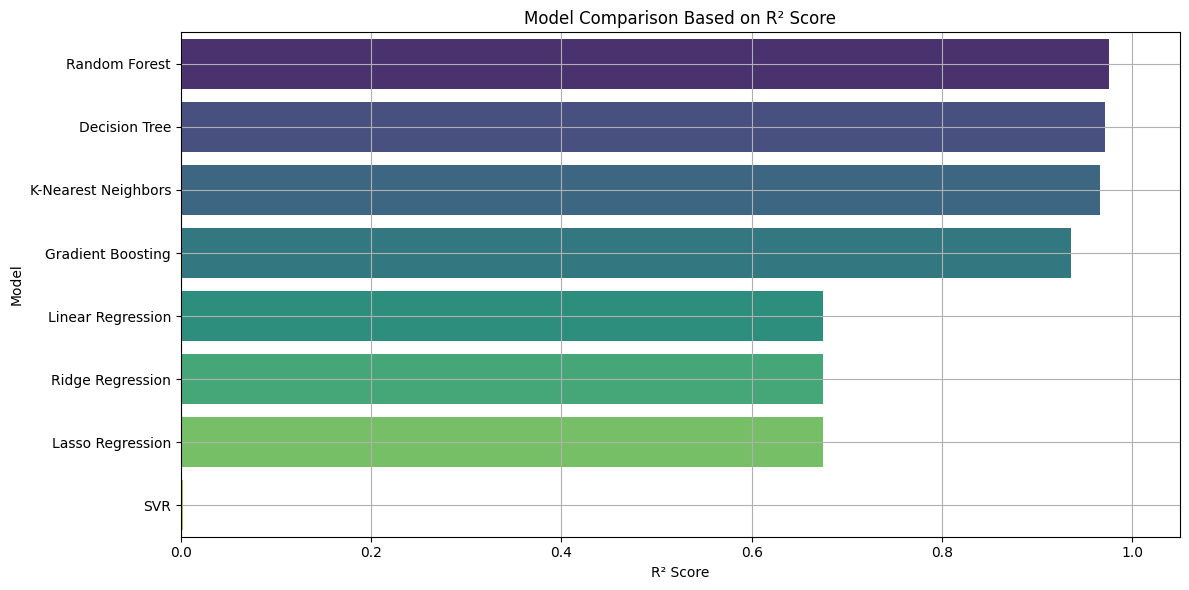

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Load and clean dataset
df = pd.read_csv("/content/Salary_Data.csv")  # adjust path if needed
df_cleaned = df.dropna().reset_index(drop=True)

# Encode categorical features
le_gender = LabelEncoder()
le_edu = LabelEncoder()
le_job = LabelEncoder()
df_cleaned['Gender'] = le_gender.fit_transform(df_cleaned['Gender'])
df_cleaned['Education Level'] = le_edu.fit_transform(df_cleaned['Education Level'])
df_cleaned['Job Title'] = le_job.fit_transform(df_cleaned['Job Title'])

# Split features and target
X = df_cleaned.drop(columns=['Salary'])
y = df_cleaned['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = r2_score(y_test, y_pred)

# Convert to DataFrame
r2_df = pd.DataFrame(list(results.items()), columns=["Model", "R2 Score"])
r2_df = r2_df.sort_values(by="R2 Score", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="R2 Score", y="Model", data=r2_df, palette="viridis")
plt.title("Model Comparison Based on R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.xlim(0, 1.05)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# Save the best model (Random Forest) using joblib
import joblib

# Train on the full cleaned dataset
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X, y)

# Save the model to disk
joblib.dump(best_model, "salary_predictor_rf_model.pkl")

# Also save encoders for use in Streamlit app
joblib.dump(le_gender, "encoder_gender.pkl")
joblib.dump(le_edu, "encoder_edu.pkl")
joblib.dump(le_job, "encoder_job.pkl")


['encoder_job.pkl']